In [1]:
import spyx
import spyx.nn as snn

import jax
import jax.numpy as jnp
import numpy as np

import nir
# for loading dataset
import torch

import matplotlib.pyplot as plt

In [2]:
ng = nir.read("braille_noDelay_noBias_subtract_subgraph.nir")

In [3]:
data = torch.load("ds_test.pt")

In [4]:
x, y = data.tensors

In [5]:
x = jnp.array(x)

In [6]:
y = jnp.array(y)

In [7]:
x.shape # --> 256 time

(140, 256, 12)

In [8]:
ng.nodes.keys()

dict_keys(['fc1', 'fc2', 'input', 'lif1', 'lif2', 'output'])

In [9]:
10 / .001 * 1e-4

1.0

In [10]:
ng.nodes["lif1"].nodes

{'input': Input(input_type={'input': array([40])}),
 'lif1': CubaLIF(tau_syn=array([0.0004, 0.0004, 0.0004, 0.0004, 0.0004, 0.0004, 0.0004, 0.0004,
        0.0004, 0.0004, 0.0004, 0.0004, 0.0004, 0.0004, 0.0004, 0.0004,
        0.0004, 0.0004, 0.0004, 0.0004, 0.0004, 0.0004, 0.0004, 0.0004,
        0.0004, 0.0004, 0.0004, 0.0004, 0.0004, 0.0004, 0.0004, 0.0004,
        0.0004, 0.0004, 0.0004, 0.0004, 0.0004, 0.0004, 0.0004, 0.0004]), tau_mem=array([0.00066667, 0.00066667, 0.00066667, 0.00066667, 0.00066667,
        0.00066667, 0.00066667, 0.00066667, 0.00066667, 0.00066667,
        0.00066667, 0.00066667, 0.00066667, 0.00066667, 0.00066667,
        0.00066667, 0.00066667, 0.00066667, 0.00066667, 0.00066667,
        0.00066667, 0.00066667, 0.00066667, 0.00066667, 0.00066667,
        0.00066667, 0.00066667, 0.00066667, 0.00066667, 0.00066667,
        0.00066667, 0.00066667, 0.00066667, 0.00066667, 0.00066667,
        0.00066667, 0.00066667, 0.00066667, 0.00066667, 0.00066667]), r=array([

In [11]:
ng.edges

[('input', 'fc1'),
 ('fc1', 'lif1'),
 ('lif1', 'fc2'),
 ('fc2', 'lif2'),
 ('lif2', 'output')]

In [12]:
n_list = ["input", "fc1", "lif1", "output"]
subgraph_nodes = {k : ng.nodes[k] for k in n_list}
subgraph_edges = [
    ('input', 'fc1'),
    ('fc1', 'lif1'),
    ('lif1', 'output')
]
subgraph = nir.NIRGraph(subgraph_nodes, subgraph_edges)

In [13]:
subgraph.nodes["output"].output_type['output'] = np.array([40])

In [14]:
SNN, params = spyx.nir.from_nir(subgraph, x, dt=1e-4, return_all_states=True)

found subgraph, trying to parse as RNN
found subgraph, trying to parse as RNN


In [15]:
params.keys()

dict_keys(['linear', 'RCuBaLIF'])

In [16]:
a, b = SNN.apply(params, x)

found subgraph, trying to parse as RNN


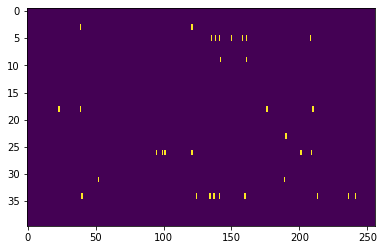

In [17]:
plt.figure(figsize=(12,4))
plt.imshow(a[0].T, aspect=4, interpolation="none")

In [18]:
ng = nir.read("braille_noDelay_noBias_subtract_subgraph.nir")

In [ ]:
SNN, params = spyx.nir.from_nir(ng, x, dt=1e-4, return_all_states=True)

found subgraph, trying to parse as RNN


In [ ]:
a, b = SNN.apply(params, x)

In [ ]:
plt.figure(figsize=(12,4))
plt.imshow(a[0].T, aspect=10, interpolation="none")

In [ ]:
y

In [ ]:
spyx.fn.integral_accuracy(a, y)

In [ ]:
params